# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [18]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

In [19]:
resource_name='beachwatch-sd'

In [20]:
pkg.resource(resource_name)

Header,Type,Description
program,string,
parentproject,string,
project,string,
stationname,string,
stationcode,string,
sampledate,date,
collectiontime,time,
locationcode,string,
collectiondepth,integer,
unitcollectiondepth,string,


In [21]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [22]:
df.head()

,program,parentproject,project,stationname,stationcode,sampledate,collectiontime,locationcode,collectiondepth,unitcollectiondepth,...,regional_board,rb_number,huc8,huc8_number,huc10,huc10_number,huc12,huc12_number,waterbody_type,sampleid
0,BeachWatch,BeachWatch_San Diego County,BeachWatch_San Diego County,"EH-010-Imperial Beach municipal beach, other, ...",EH-010,1999-04-02,2018-07-27,SurfZone,-88,NR,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Recorded
1,BeachWatch,BeachWatch_San Diego County,BeachWatch_San Diego County,"EH-010-Imperial Beach municipal beach, other, ...",EH-010,1999-04-29,2018-07-27,SurfZone,-88,NR,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Recorded
2,BeachWatch,BeachWatch_San Diego County,BeachWatch_San Diego County,"EH-010-Imperial Beach municipal beach, other, ...",EH-010,1999-04-30,2018-07-27,SurfZone,-88,NR,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Recorded
3,BeachWatch,BeachWatch_San Diego County,BeachWatch_San Diego County,"EH-010-Imperial Beach municipal beach, other, ...",EH-010,1999-05-26,2018-07-27,SurfZone,-88,NR,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Recorded
4,BeachWatch,BeachWatch_San Diego County,BeachWatch_San Diego County,"EH-010-Imperial Beach municipal beach, other, ...",EH-010,1999-05-26,2018-07-27,SurfZone,-88,NR,...,San Diego,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Recorded


In [23]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [24]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,29
const,34
datetime,2
number,3
other,11


# Constant Columns

In [25]:
if const_col_names:
    df[const_col_names].drop_duplicates().T

# Empty Columns

In [26]:
if empty_col_names:
    df[empty_col_names].drop_duplicates().T

# Date and Time Columns

In [27]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202257 entries, 0 to 202256
Data columns (total 2 columns):
sampledate        202257 non-null datetime64[ns]
collectiontime    202257 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 3.1 MB


None

,count,unique,top,freq,first,last
sampledate,202257,3836,2005-09-06 00:00:00,260,1998-07-21 00:00:00,2013-12-31 00:00:00
collectiontime,202257,681,2018-07-27 00:00:00,57144,2018-07-27 00:00:00,2018-07-27 23:52:00


# Number Columns

In [28]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202257 entries, 0 to 202256
Data columns (total 3 columns):
result             198271 non-null float64
targetlatitude     202257 non-null float64
targetlongitude    202257 non-null float64
dtypes: float64(3)
memory usage: 4.6 MB


None

,count,mean,std,min,25%,50%,75%,max
result,198271.0,22699.602226,573147.627822,-10.000000,4.000000,20.000000,30.000000,2.800000e+07
targetlatitude,202257.0,32.864222,0.206458,32.534401,32.714802,32.794300,33.026001,3.338600e+01
targetlongitude,202257.0,-117.256097,0.081393,-117.595001,-117.288002,-117.255997,-117.209999,-1.170630e+02


In [29]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].fillna(0),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        


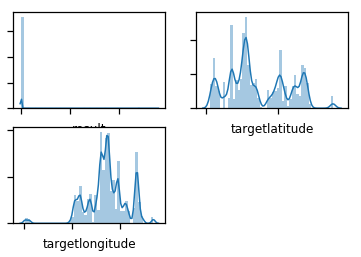

In [30]:
plot_histograms(df[number_col_names])

# Other Columns

In [31]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202257 entries, 0 to 202256
Data columns (total 11 columns):
stationname         202257 non-null object
stationcode         202257 non-null object
labbatch            202257 non-null object
methodname          202257 non-null object
analyte             202257 non-null object
unit                202257 non-null object
resultqualcode      201920 non-null object
qacode              202257 non-null object
sampleagency        202257 non-null object
labagency           202257 non-null object
submittingagency    202257 non-null object
dtypes: object(11)
memory usage: 17.0+ MB


None

,count,unique,top,freq
stationname,202257,172,"IB-080-Coronado City beaches, San Diego",5065
stationcode,202257,172,IB-080,5065
labbatch,202257,9013,SD-11/2/2004,131
methodname,202257,8,SM 9222 B,49791
analyte,202257,4,"Coliform, Total",66992
unit,202257,2,MPN/100 mL,143346
resultqualcode,201920,6,=,107776
qacode,202257,2,NR,174811
sampleagency,202257,11,SDCDEH,84275
labagency,202257,11,SDCDEH,84275
